In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv(r'D:\Durham AI\SEM - II\AI_Enterperise Systems\pending\breast-cancer-wisconsin.csv',na_values='?')

In [7]:
df.head(5)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [8]:
df.tail(5)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4
698,897471,4,8,8,5,4,5.0,10,4,1,4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample code number           699 non-null    int64  
 1   Clump Thickness              699 non-null    int64  
 2   Uniformity of Cell Size      699 non-null    int64  
 3   Uniformity of Cell Shape     699 non-null    int64  
 4   Marginal Adhesion            699 non-null    int64  
 5   Single Epithelial Cell Size  699 non-null    int64  
 6   Bare Nuclei                  683 non-null    float64
 7   Bland Chromatin              699 non-null    int64  
 8   Normal Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [10]:
df.isnull().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [11]:
df.reset_index(drop=True)
df.fillna(999, inplace=True)

In [14]:
df["Class"] = np.where(df["Class"] == 2, 0, 1)

<AxesSubplot:>

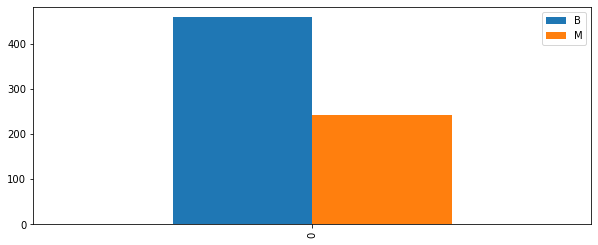

In [15]:
df_B = df[df['Class'] == 0]
df_M = df[df['Class'] == 1]
df_bm_data = {'B': [df_B.shape[0]], 'M': [df_M.shape[0]]}
df_bm_plot = pd.DataFrame(data=df_bm_data)
df_bm_plot.plot(kind='bar', figsize=(10,4))

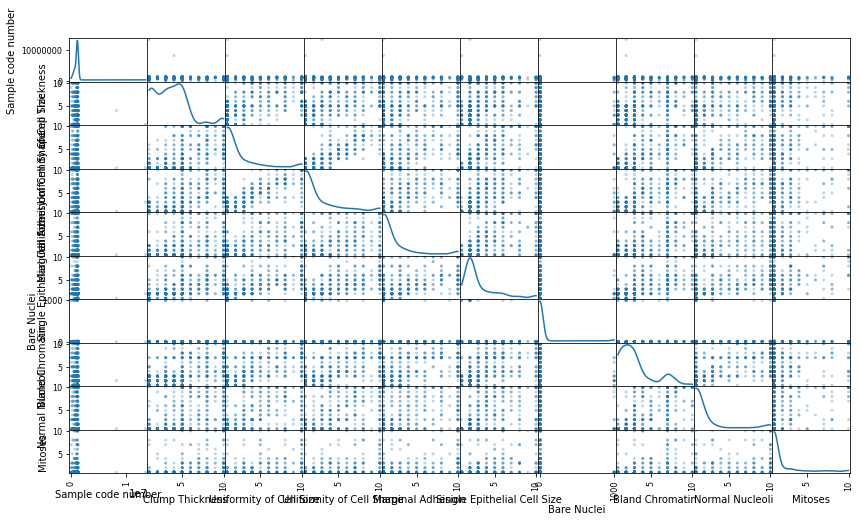

In [16]:
diagnosis = df['Class']
features = df.drop(['Class'], axis = 1)
pd.plotting.scatter_matrix(features, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

<AxesSubplot:>

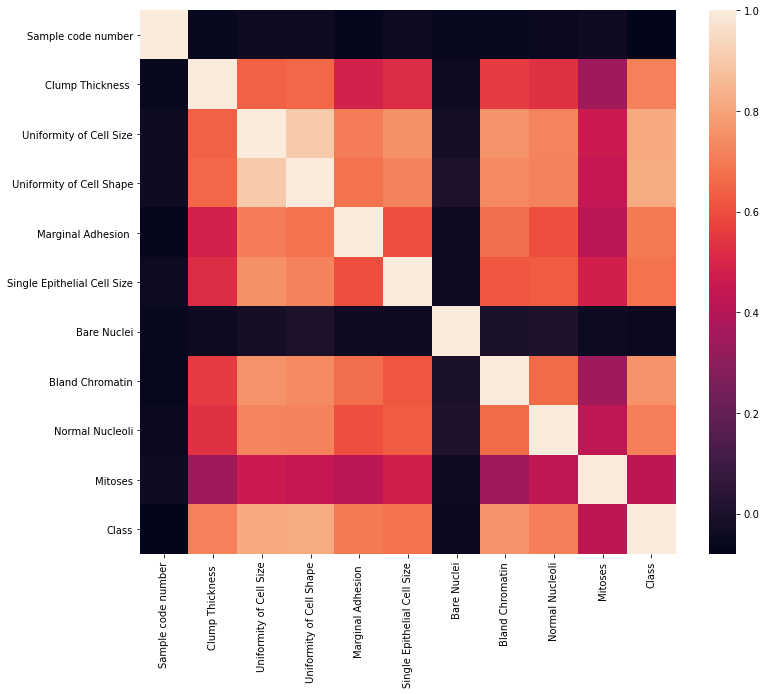

In [17]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), ax=ax)

In [18]:
# Quartile range

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
inter_quartile_range = Q3 - Q1

# quartiles and interquartile range

df_out = df[~((df < (Q1 - (1.5 * inter_quartile_range))) | (df > (Q3 + (1.5 * inter_quartile_range)))).any(axis=1)]
df.shape, df_out.shape

((699, 11), (480, 11))

In [19]:
# Separate labels and features
X = df_out.drop(columns=['Class'])
y = df_out['Class']

#Convert the M to 1 and B to 0
label = LabelEncoder()
y = label.fit_transform(y)
y[:20]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [20]:
# Spilt the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# we used 20% test data
# check the size before beginning

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((384, 10), (96, 10), (384,), (96,))

In [21]:
# custom score_accuracy
def score_accuracy(y_true, y_pred):
    cnf_matrix = confusion_matrix(y_true, y_pred)
    total = sum(map(sum, cnf_matrix))
    tp = cnf_matrix[1, 1]
    tn = cnf_matrix[0, 0]
    return round((tp + tn) / total, 2)

In [22]:
# Support Vector Machine

model = SVC(gamma='auto', kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [24]:
# acc list and rcc list stores the output of each model
acc_list = []

# find accuracy
ac = accuracy_score(y_test, y_pred)
acc_list.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)

print("****************************************************")
print("Logistic Regression : ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy {0}".format(ac))

****************************************************
Logistic Regression : 
Training Set Accuracy :  0.8776041666666666
Test Set Accuracy 0.8645833333333334
